In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scripts.visualization import plot_time_series

 Load the raw stock data.

In [10]:
ticker = "AAPL"
raw_data_path = f"../data/raw_data/{ticker}.csv"

# Skip metadata and load actual data
data = pd.read_csv(raw_data_path, skiprows=2)

# Assign correct column names
data.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert Date to datetime and set as index
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

# Print first 5 rows
print(data.head())

                Close       High        Low       Open     Volume
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307526  73.609760  71.849548  71.849548  132079200


Compute summary statistics.

In [11]:
print(data.describe())


             Close         High          Low         Open        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    151.978334   153.506152   150.274688   151.823406  9.057384e+07
std      42.018034    42.158955    41.794455    41.961617  5.325460e+07
min      54.378582    55.379535    51.528416    55.277744  2.323470e+07
25%     126.780067   127.902492   124.771560   126.223176  5.546825e+07
50%     150.563568   152.311630   148.624457   150.383138  7.627980e+07
75%     176.599865   178.156411   175.028874   176.405307  1.077425e+08
max     258.396667   259.474086   257.010028   257.568678  4.265100e+08


 Plot closing prices over time.

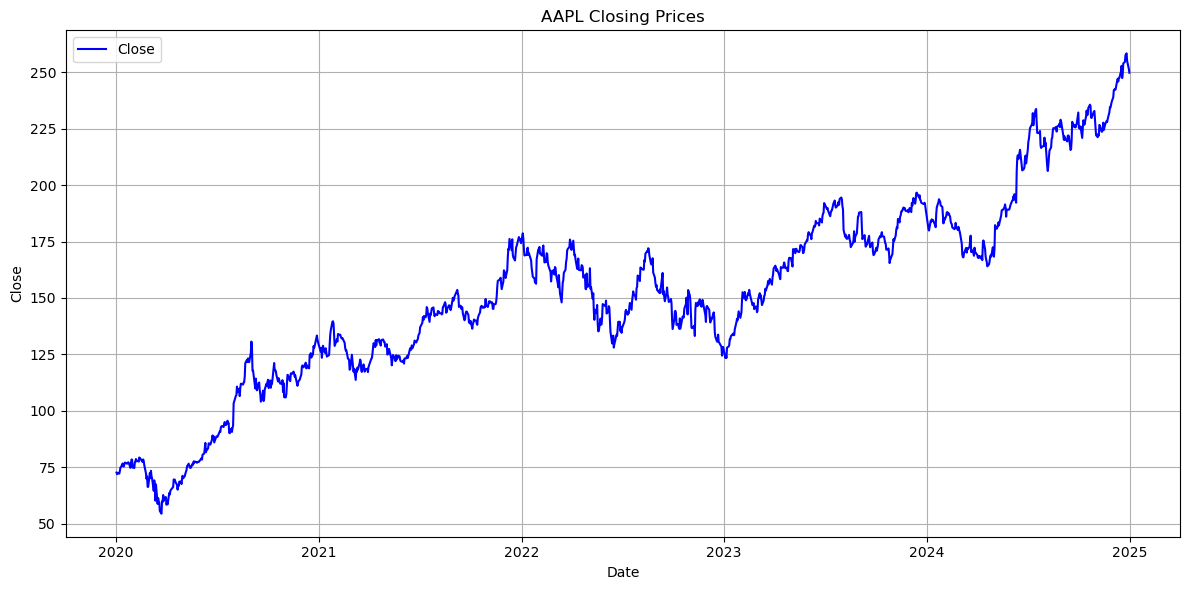

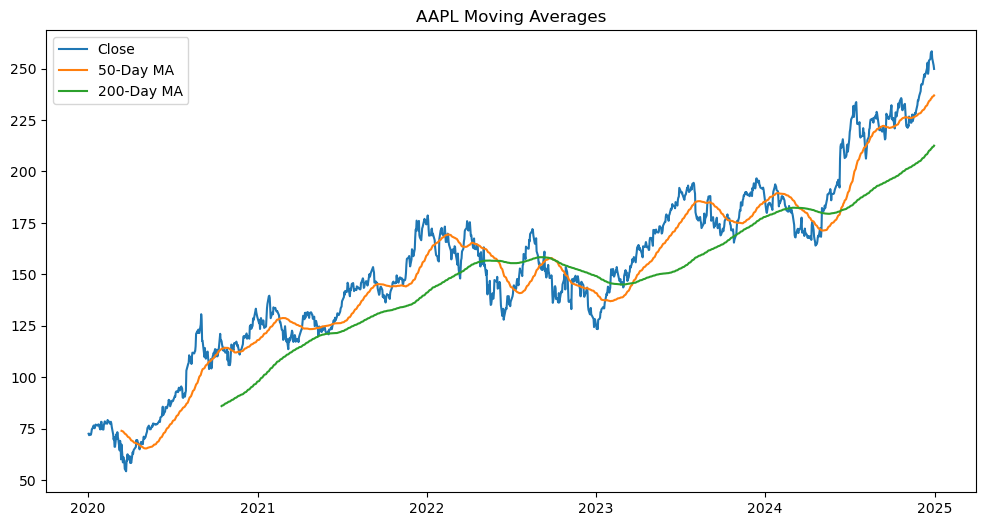

In [17]:
plot_time_series(data, column="Close", title=f"{ticker} Closing Prices")
plt.savefig("../visualizations/eda_plots/closing_prices.png")
plt.show()
data["MA50"] = data["Close"].rolling(window=50).mean()
data["MA200"] = data["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close")
plt.plot(data["MA50"], label="50-Day MA")
plt.plot(data["MA200"], label="200-Day MA")
plt.title(f"{ticker} Moving Averages")
plt.legend()
plt.savefig("../visualizations/eda_plots/moving_averages.png")
plt.show()


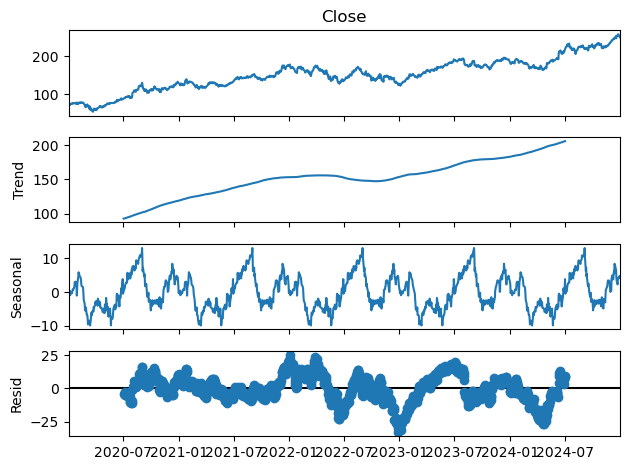

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"].dropna(), model="additive", period=252)
result.plot()
plt.savefig("../visualizations/eda_plots/seasonal_decomposition.png")
plt.show()